# Sentiment analysis using Word2Vec Embedding and LSTM

In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'amazon_reviews.txt',
 'BERT-Hugging face.ipynb',
 'count_vectorizer.ipynb',
 'TFIDF.ipynb',
 'word2vec-Copy1.ipynb',
 'word2vec.ipynb']

In [3]:
# loading the dataset in to dataframe
amazon_review = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])
df = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])

In [4]:
df['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [5]:
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [6]:
# ----- convert(didn't,did not)
# t = "At eight o'clock on Thursday morning Arthur didn't feel 95very good.95French-Fries"  
# At eight o'clock on Thursday morning Arthur did not feel 95very good.95French-Fries

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [7]:
df['review'] = df['review'].apply(decontracted)

In [8]:
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [9]:
#remove words and digits like noon65, or 6.
def rem_wor_dig(text):
    output = ''.join(c for c in text if not c.isdigit())
    return(output)

In [10]:
df['review'] = df['review'].apply(rem_wor_dig)

In [11]:
df['review'][3]

'Tied to charger for conversations lasting more than  minutes.MAJOR PROBLEMS!!'

In [12]:
# removing puncuation
def rem_punc(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return " ".join(tokens)

In [13]:
df['review'] = df['review'].apply(rem_punc)

In [14]:
df['review'][3]

'Tied to charger for conversations lasting more than minutes MAJOR PROBLEMS'

In [15]:
df['review'] = df['review'].apply(str. lower)

In [16]:
#custom stopwords list
stopwords = ['from', "she's", 'theirs', 'be', 'won', 'shouldn', 'should', 'or', 'were', 'she', "shouldn't", 'until', 'himself', 'd', 'at', 'than', 'aren', "doesn't", 've', 'o', 'mustn', "you've", 'ours', 'wasn', 'but', 'once', 'there', "didn't", 'we', 'has', 'am', 'of', 'own', "you'd", 'in', 'he', "shan't", "mightn't", "don't", 'having', 'with', 'my', 'its', 'had', 'y', 'yourselves', 'didn', 'your', 'each', "haven't", 'yourself', 'and', 'is', 'nor', 'who', 'whom', 'couldn', 'this', 'mightn', 'shan', 'have', 'for', 'her', 'hers', 'other', 'during', 'herself', 'themselves', 'here', 'them', 's', 'hadn', "it's", 'so', "mustn't", 'did', 'about', 'after', "hadn't", 'haven', "you'll", 'can', 'just', 'isn', 'the', 'our', 'by', 'further', 'do', 'on', 're', 'doing', "aren't", 'off', 'some', 'an', 'only', 'over', 'me', 'while', 'will', 'too', 'i', 'under', 'more', "you're", 'their', 'you', 'as', 'ourselves', 'both', 'where', 'then', "hasn't", "weren't", "won't", 'before', 'are', "wouldn't", 'needn', 'because', 'doesn', 'into', 'that', 'between', "wasn't", 'it', 'him', 'up', 'above', 'his', 'these', 'm', 'been', "couldn't", 'to', 'those', 'same', 'don', 'out', 'ma', 'below', 'being', 'such', 'what', 'wouldn', "that'll", 'itself', 'hasn', "isn't", 'again', 'through', 'very', 'll', 'which', 'when', "should've", 'any', 't', 'how', 'all', "needn't", 'yours', 'weren', 'myself', 'a', 'they', 'if', 'ain', 'does', 'was', 'now', 'most', 'why']

In [17]:
# lemmantizing and removing stopwords from custom list
lemmatizer = WordNetLemmatizer()
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [lemmatizer.lemmatize(word) for word in text_tokens if not word in stopwords]
    return(tokens_without_sw)

In [18]:
df['review'] = df['review'].apply(remove_stopwords)

In [19]:
df['review'][3]

['tied', 'charger', 'conversation', 'lasting', 'minute', 'major', 'problem']

In [20]:
# creating the function to join the text
def join_word(text):
    s = [' '.join(word for word in text)]
    return(s)

In [21]:
df

,review,sentiment
0,"[no, way, plug, u, unless, go, converter]",0
1,"[good, case, excellent, value]",1
2,"[great, jawbone]",1
3,"[tied, charger, conversation, lasting, minute,...",0
4,"[mic, great]",1
...,...,...
995,"[screen, get, smudged, easily, touch, ear, face]",0
996,"[piece, junk, lose, call, phone]",0
997,"[item, not, match, picture]",0
998,"[thing, disappoint, infra, red, port, irda]",0


In [22]:
#df['review'] = df['review'].apply(join_word)

In [23]:
df

,review,sentiment
0,"[no, way, plug, u, unless, go, converter]",0
1,"[good, case, excellent, value]",1
2,"[great, jawbone]",1
3,"[tied, charger, conversation, lasting, minute,...",0
4,"[mic, great]",1
...,...,...
995,"[screen, get, smudged, easily, touch, ear, face]",0
996,"[piece, junk, lose, call, phone]",0
997,"[item, not, match, picture]",0
998,"[thing, disappoint, infra, red, port, irda]",0


In [24]:
X = df['review']
y= df.sentiment

In [28]:
# iorting word2vec pretrained embeddings with default size of 100
from gensim.models import Word2Vec, KeyedVectors
model=Word2Vec(X, window=5, min_count=1, workers=4)

In [29]:
# printing the pretrained embedding of words from the corpus
model = model.wv
model.key_to_index

{'not': 0,
 'phone': 1,
 'great': 2,
 'work': 3,
 'good': 4,
 'product': 5,
 'headset': 6,
 'quality': 7,
 'battery': 8,
 'sound': 9,
 'well': 10,
 'would': 11,
 'one': 12,
 'use': 13,
 'ear': 14,
 'case': 15,
 'like': 16,
 'time': 17,
 'get': 18,
 'price': 19,
 'no': 20,
 'excellent': 21,
 'could': 22,
 'recommend': 23,
 'really': 24,
 'problem': 25,
 'service': 26,
 'best': 27,
 'fit': 28,
 'call': 29,
 'make': 30,
 'nice': 31,
 'love': 32,
 'also': 33,
 'charger': 34,
 'new': 35,
 'worked': 36,
 'item': 37,
 'money': 38,
 'better': 39,
 'buy': 40,
 'ever': 41,
 'first': 42,
 'bluetooth': 43,
 'even': 44,
 'car': 45,
 'easy': 46,
 'look': 47,
 'bought': 48,
 'year': 49,
 'reception': 50,
 'comfortable': 51,
 'used': 52,
 'happy': 53,
 'purchase': 54,
 'charge': 55,
 'poor': 56,
 'thing': 57,
 'waste': 58,
 'still': 59,
 'few': 60,
 'two': 61,
 'device': 62,
 'cell': 63,
 'bad': 64,
 'worst': 65,
 'made': 66,
 'piece': 67,
 'camera': 68,
 'life': 69,
 'day': 70,
 'fine': 71,
 'enough'

In [30]:
len(model.key_to_index)

1574

In [31]:
# headset embedding
model['headset']

array([ 0.00699844, -0.0016284 , -0.00074183,  0.00136251,  0.00112406,
       -0.00469915,  0.0069667 ,  0.0070335 , -0.00615479, -0.00280666,
        0.00455446, -0.00357215, -0.00115622,  0.01153993, -0.00471228,
       -0.00349703,  0.01074579,  0.00437571,  0.00138635, -0.01492755,
        0.00387864, -0.00135044,  0.0109376 , -0.00067855,  0.00133847,
        0.00317669, -0.00391073, -0.00716494, -0.00306841, -0.00171313,
        0.01045954,  0.00944217,  0.00044622,  0.00070073, -0.00790199,
        0.00545459, -0.0068434 , -0.01071584, -0.00690773, -0.01564087,
        0.00694619, -0.00920181,  0.00777051, -0.00686718,  0.00628083,
        0.00888873, -0.01224484, -0.01107814, -0.00307031, -0.00119036,
        0.00081875, -0.01097549, -0.0096543 ,  0.00151114, -0.00979026,
       -0.00796918, -0.0012923 , -0.00946458, -0.01038753, -0.00751635,
        0.00032263, -0.00471394,  0.00656467,  0.00052977, -0.00728698,
        0.00988106, -0.00406105, -0.00243884, -0.01132665, -0.00

In [32]:
# most similar items to the headset
model.most_similar('headset') 

[('item', 0.4567395746707916),
 ('look', 0.4369319975376129),
 ('fit', 0.4360641539096832),
 ('not', 0.4181462824344635),
 ('motorola', 0.3970794379711151),
 ('like', 0.3886971175670624),
 ('great', 0.3680192530155182),
 ('kind', 0.36704617738723755),
 ('enough', 0.35556522011756897),
 ('even', 0.3453795909881592)]

In [33]:
len(model['headset'])

100

In [34]:
print(model.similarity('headset', 'bad'))

0.24241501


In [35]:
# averaging the embedding to form the sentence embedding
def w2v_embedding(text):    
    vector = []
    embedding = np.zeros(100)
    for word in text:
        #print(model[word])
        #print (word)
        embedding += model[word]
    embedding = embedding/len(text)
    vector.append(embedding)
    return (vector)

In [36]:
# creating the embedding for the combination of two words
w2v_embedding(['no', 'way'])

[array([ 2.92043202e-03,  5.09908248e-03, -2.29028182e-03,  4.24623018e-03,
        -5.22662653e-04,  6.88934990e-04,  4.81510539e-03,  5.15261362e-03,
        -1.58684235e-03, -1.97147584e-03,  1.27771753e-04,  3.34273325e-04,
         1.36500574e-03,  1.23509206e-03,  1.83616512e-03, -2.16556608e-03,
         4.87325713e-04,  1.67840556e-03, -7.24243536e-03, -3.40748415e-03,
         2.09562771e-03,  1.24640879e-03, -7.62357214e-03,  7.61231640e-04,
        -1.26275863e-03, -4.53187805e-03,  4.36547084e-03, -7.19100703e-03,
        -5.99205063e-03,  1.08086737e-03, -3.51667637e-04, -8.09348864e-03,
        -8.29056429e-04,  2.50431569e-03, -1.56682724e-03,  8.65319138e-03,
         3.02179775e-03, -1.18980324e-03, -4.82164699e-03, -4.52356017e-03,
        -1.66108459e-03, -6.51137461e-03, -4.52878192e-03,  3.17426340e-03,
         1.60300675e-04, -7.81042757e-03, -1.04154567e-02, -6.10825396e-03,
        -3.34742712e-04, -4.42082295e-04,  5.17364242e-03, -8.24903743e-03,
         2.0

In [37]:
X = X.apply(w2v_embedding)

In [38]:
X

0      [[0.002187657103474651, 0.0007020395215866822,...
1      [[-0.0026550401089480147, 0.004043310997076333...
2      [[-0.0020948388264514506, 0.002399414384854026...
3      [[0.0026349971470023903, 0.003192693693563342,...
4      [[0.0017080080579034984, 0.0052416520193219185...
                             ...                        
995    [[-1.909425814769098e-05, 0.003083642588795295...
996    [[-0.0029823896242305637, 0.000680752366315573...
997    [[-0.000388235755963251, 0.0039395218482241035...
998    [[0.0006322822300717235, 0.003882971684409616,...
999    [[-0.002942388159378121, 0.004375844340150555,...
Name: review, Length: 1000, dtype: object

In [39]:
# converting the data in to the dataframe
def convert(data): 
    X_train_df = pd.DataFrame(data) 
    l = [i[0] for i in X_train_df['review']]
    se = pd.Series(l)
    X_train_df['new_col'] = se.values
    j = [i for i in X_train_df['new_col']]
    numpy_array = np.array(j)
    dff = pd.DataFrame(numpy_array,index=data.index)
    return(dff)

In [40]:
X = convert(X) 

In [41]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=100,stratify=y)

In [42]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
397,-0.001984,0.005489,-0.001728,-0.001574,-0.002758,0.000461,0.004094,0.005273,-0.006257,-0.002959,...,0.003500,0.006873,-0.002167,0.001748,0.006584,0.002812,-0.000112,-0.002776,0.005632,-0.001861
707,0.000227,-0.000558,0.000314,-0.001393,0.003862,-0.005880,0.001047,0.006662,-0.004201,0.002978,...,0.000435,0.001130,-0.001390,-0.000364,0.002584,0.005827,0.002173,0.000466,0.000514,0.002158
772,0.000533,-0.000157,-0.000768,0.001079,-0.000845,-0.008832,0.003049,0.013170,-0.003840,-0.000211,...,0.004168,0.001675,0.003758,0.002838,0.004528,0.003511,-0.001060,-0.001103,0.000485,0.000519
602,-0.004312,0.004515,0.003398,-0.001508,0.005778,-0.006955,-0.000174,0.014424,-0.003213,-0.005927,...,0.006153,0.001905,0.002116,-0.001648,0.008030,0.004535,0.000855,-0.008240,0.000773,-0.001317
270,0.003836,0.000511,-0.002064,0.002331,-0.000911,-0.003294,-0.002486,0.006522,-0.004955,-0.000069,...,0.002951,0.000297,-0.001017,0.003069,0.002880,0.002235,-0.003296,-0.001434,0.001815,0.001170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,-0.003761,0.003026,0.003883,0.003889,-0.000038,-0.007056,0.005816,0.010637,-0.004236,-0.002577,...,0.007018,0.005933,0.005685,0.004498,0.010288,0.007360,-0.002602,-0.008872,0.000668,0.000289
281,0.001059,-0.006893,-0.007746,-0.004603,0.003392,-0.007497,-0.003971,0.010343,0.006379,-0.007746,...,0.001162,0.004818,-0.001195,0.004325,0.007777,0.008789,0.001653,-0.002836,0.004678,-0.001052
253,0.007195,-0.003058,-0.002650,0.000769,-0.001661,-0.000642,0.003025,0.001374,0.004952,-0.001489,...,-0.001465,0.004675,0.001643,-0.004721,0.000569,0.006411,-0.000013,0.000363,0.000520,-0.000284
521,-0.002909,0.002870,-0.000833,-0.000192,-0.002965,-0.002612,0.004178,0.001562,-0.002125,-0.004431,...,0.006158,-0.001412,-0.003484,0.002956,0.002741,0.001875,0.001729,-0.003145,0.005213,0.002285


In [43]:
y_train

397    1
707    1
772    0
602    1
270    0
      ..
50     0
281    1
253    1
521    1
612    1
Name: sentiment, Length: 900, dtype: int64

## Logistic Regression

In [44]:
# importing the model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [45]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = model_lr.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
print (accuracy_score(y_test,y_pred))

0.69


In [48]:
from sklearn.metrics import fbeta_score
fb_rf = fbeta_score(y_test, y_pred, beta=1)
fb_rf

0.6516853932584269

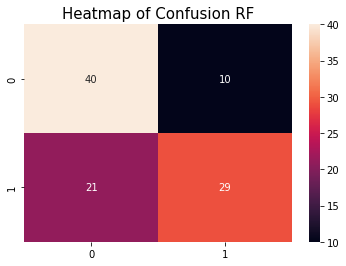

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_rf = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

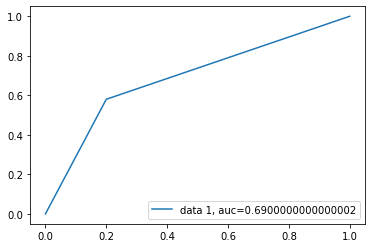

In [53]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X_train,y_train)

GaussianNB()

In [55]:
y_pred_nb = model_nb.predict(X_test)

In [57]:
from sklearn.metrics import fbeta_score
fb_rf = fbeta_score(y_test, y_pred_nb, beta=1)
fb_rf

0.5714285714285714

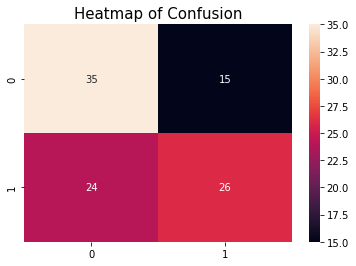

In [59]:
cm_rf = confusion_matrix(y_test, y_pred_nb)
plt.title('Heatmap of Confusion', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

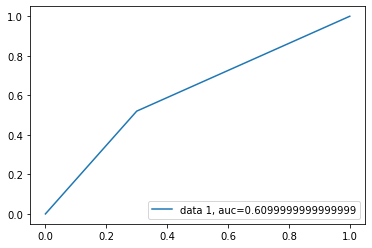

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred_nb)
auc = roc_auc_score(y_test, y_pred_nb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.002188,0.000702,-0.002953,-0.002322,0.002252,-0.002195,0.000129,0.003218,0.000030,0.000498,...,0.000275,0.000801,0.000186,0.004179,0.003828,0.001896,0.002767,-0.003353,-0.002377,-0.002349
1,-0.002655,0.004043,-0.000944,0.003075,-0.000444,-0.001315,-0.000519,0.003124,-0.004578,0.003253,...,0.005884,-0.001754,0.000336,-0.001942,0.001902,0.000739,0.002944,0.003621,0.001610,0.003692
2,-0.002095,0.002399,0.001184,-0.005248,0.008363,0.004232,-0.004867,0.002575,-0.005933,0.005292,...,-0.001495,0.006705,0.008050,0.003546,0.009012,-0.000641,0.007183,0.000187,0.000569,-0.001944
3,0.002635,0.003193,0.002831,0.002765,-0.002409,-0.001736,-0.003094,0.004492,0.001931,0.000016,...,-0.001806,0.003214,0.000447,0.002397,0.000888,0.001017,-0.000610,-0.001078,-0.003514,-0.003103
4,0.001708,0.005242,-0.001236,0.001932,0.007746,0.002358,0.002276,0.007684,-0.002938,0.005230,...,0.000660,0.005220,0.005907,0.000945,0.010482,0.007230,0.001688,-0.001617,0.001680,-0.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.000019,0.003084,0.000882,-0.003436,0.005461,-0.005386,0.001619,0.006833,-0.000762,-0.002874,...,0.005181,0.002517,0.003661,0.003537,0.003854,0.001747,0.003690,-0.002743,-0.004203,0.000843
996,-0.002982,0.000681,-0.000905,0.000281,0.003944,-0.007347,-0.001252,0.006095,-0.005476,-0.000661,...,-0.001040,0.007135,0.000532,0.002753,0.002727,0.002150,0.003536,-0.006438,-0.002136,0.002597
997,-0.000388,0.003940,0.006638,-0.002407,-0.004923,-0.009506,0.007991,0.007269,-0.003293,0.000252,...,0.002787,0.000955,-0.001865,0.002628,0.007753,0.005819,-0.000610,-0.001643,0.000536,0.002130
998,0.000632,0.003883,0.002484,-0.005375,-0.000466,0.000466,-0.000694,0.000102,-0.001709,-0.000232,...,0.002760,0.001640,-0.002319,-0.000619,0.002409,0.004692,0.001792,-0.003657,-0.000255,0.004807


In [49]:
y_train

397    1
707    1
772    0
602    1
270    0
      ..
50     0
281    1
253    1
521    1
612    1
Name: sentiment, Length: 900, dtype: int64

## LSTM

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [71]:
# define model
model = Sequential()
model.add(LSTM(100, activation='tanh',input_shape=(100,1)))
#model.add(LSTM(100, activation='tanh',return_sequences= True))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [72]:
X_t = X_train.to_numpy()


In [73]:
y_t = y_train.to_numpy()

In [74]:
y_t[0]

1

In [75]:
X_t[0]

array([-1.98449850e-03,  5.48854113e-03, -1.72784022e-03, -1.57410570e-03,
       -2.75828348e-03,  4.61281743e-04,  4.09389303e-03,  5.27297698e-03,
       -6.25748036e-03, -2.95876091e-03, -3.64113197e-03, -4.11690508e-03,
        3.13346197e-03, -1.42142565e-03,  2.76441841e-03, -6.10797617e-03,
        3.40208799e-03, -2.21321980e-03, -5.82194274e-03, -7.51494182e-03,
       -4.45861532e-03,  5.79655578e-04, -1.19937739e-04, -2.36560769e-03,
       -2.77114473e-03, -9.43115602e-04,  1.75365891e-03, -5.95045718e-03,
       -2.38144518e-03,  6.69016720e-03,  5.24973318e-03, -7.18576973e-03,
       -2.14531886e-03, -5.26808936e-03, -7.28836656e-03,  7.79587100e-03,
       -3.80655455e-04, -3.83908822e-04,  5.42463560e-04, -7.43953713e-03,
        1.71837537e-03, -9.18608799e-04, -1.70369687e-03,  4.58982719e-03,
        2.73445516e-03, -8.29019943e-05, -3.29847250e-03, -1.90683431e-03,
        3.08194760e-04,  6.38085471e-04, -9.92643026e-04, -6.72210272e-03,
       -3.70312094e-03, -

In [76]:
model.fit(X_t,y_t,epochs = 10)

Epoch 1/10
29/29 [==============================] - 3s 56ms/step - loss: 0.6933 - accuracy: 0.5056
Epoch 2/10
29/29 [==============================] - 2s 56ms/step - loss: 0.6937 - accuracy: 0.4844
Epoch 3/10
29/29 [==============================] - 2s 55ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/10
29/29 [==============================] - 2s 56ms/step - loss: 0.6932 - accuracy: 0.5033
Epoch 5/10
29/29 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.5078
Epoch 6/10
29/29 [==============================] - 2s 54ms/step - loss: 0.6932 - accuracy: 0.4822
Epoch 7/10
29/29 [==============================] - 2s 56ms/step - loss: 0.6933 - accuracy: 0.4822
Epoch 8/10
29/29 [==============================] - 2s 55ms/step - loss: 0.6931 - accuracy: 0.4967
Epoch 9/10
29/29 [==============================] - 2s 56ms/step - loss: 0.6951 - accuracy: 0.5122
Epoch 10/10
29/29 [==============================] - 2s 56ms/step - loss: 0.6984 - accuracy: 0.4889


In [77]:
model.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [78]:
model.history.history['loss']

[0.6933033466339111,
 0.6936931610107422,
 0.6932034492492676,
 0.6931942701339722,
 0.6931357979774475,
 0.6932175159454346,
 0.6932838559150696,
 0.6931251287460327,
 0.6950597763061523,
 0.6983916163444519]

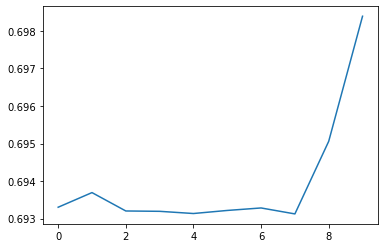

In [79]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### RESULTS = LSTM havent performed well in this case as it was constrained by the length of dataset. But Logistic regression displayed the accuracy of almost 70%.